In [1]:
import pandas as pd
import datetime
import numpy as np
import warnings

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler
warnings.filterwarnings('ignore')
plt.rcParams['font.sans-serif']=['SimHei']  # 中文
plt.rcParams['axes.unicode_minus'] = False  # 负号
path = "D:/program/program1/User_portrait/"

In [2]:
data_company = pd.read_csv(path + "20190301.csv", names = ['order_date', 'company', 'total_freight'])
data_company = data_company[data_company['total_freight'] >= 1]
data_company['order_date'] = pd.to_datetime(data_company['order_date'], format = '%Y-%m-%d')

In [117]:
# data_company = pd.read_csv(path + "20190308.csv", names = ['order_date', 'company', 'order_num', 'total_freight'])
# data_company['order_date'] = pd.to_datetime(data_company['order_date'], format = '%Y-%m-%d')

In [3]:
len(data_company)

3694012

In [6]:
# 公司下单频数
F_data = data_company['order_date'].groupby(data_company['company']).agg({'frequency' : 'count'})
F_data.head(10)

,frequency
company,
01个人刘健,2
3M苏州,8
66号定制家居,6
Dotwil点为商城,4
IT中心测试,3
IT部测试客户,2
J-VALVES,4
JoinmaxHK,1
LED灯具,4


In [7]:
# 第一次下单和最后一次下单间隔
tmp = data_company.groupby(data_company['company'])['order_date'].agg(['max', 'min'])
tmp['days'] = (tmp['max'] - tmp['min']).dt.days

In [8]:
tmp.head()

,max,min,days
company,,,
01个人刘健,2018-12-30,2018-12-28,2
3M苏州,2018-12-13,2018-09-04,100
66号定制家居,2019-01-21,2018-09-22,121
Dotwil点为商城,2019-01-30,2019-01-11,19
IT中心测试,2019-01-22,2019-01-13,9


In [9]:
data_company.sort_values(by = ['company', 'order_date'], inplace = True)
data_company.head()

,order_date,company,total_freight
1722880,2018-12-28,01个人刘健,471.0
2400666,2018-12-30,01个人刘健,198.0
3444941,2018-09-04,3M苏州,261.0
2150653,2018-09-10,3M苏州,99.0
2004667,2018-09-17,3M苏州,336.0


In [10]:
data_tmp = data_company.copy()

In [31]:
data_tmp['shift'] = data_tmp['order_date'].groupby(data_tmp['company']).shift(-1)

In [32]:
data_tmp.head()

,order_date,company,order_num,total_freight,shift
5296603,2018-12-28,01个人刘健,3,471.0,2018-12-30
5198684,2018-12-30,01个人刘健,2,198.0,NaT
9058874,2017-09-15,3M苏州,1,6060.0,2017-09-16
9468405,2017-09-16,3M苏州,1,7120.0,2017-09-18
1842563,2017-09-18,3M苏州,1,1008.0,2017-09-27


In [33]:
data_tmp.loc[data_tmp['shift'].isnull(), ['shift']] = pd.to_datetime('2019-02-08').date()    # data_tmp.loc[data_tmp['shift'].isnull(), ['order_date']].values
data_tmp.head()

,order_date,company,order_num,total_freight,shift
5296603,2018-12-28,01个人刘健,3,471.0,2018-12-30
5198684,2018-12-30,01个人刘健,2,198.0,2019-02-08
9058874,2017-09-15,3M苏州,1,6060.0,2017-09-16
9468405,2017-09-16,3M苏州,1,7120.0,2017-09-18
1842563,2017-09-18,3M苏州,1,1008.0,2017-09-27


In [34]:
data_tmp['days'] = (data_tmp['shift'] - data_tmp['order_date']).dt.days

In [37]:
data_tmp.head()

,order_date,company,order_num,total_freight,shift,days
5296603,2018-12-28,01个人刘健,3,471.0,2018-12-30,2
5198684,2018-12-30,01个人刘健,2,198.0,2019-02-08,40
9058874,2017-09-15,3M苏州,1,6060.0,2017-09-16,1
9468405,2017-09-16,3M苏州,1,7120.0,2017-09-18,2
1842563,2017-09-18,3M苏州,1,1008.0,2017-09-27,9


In [41]:
data_company.head()

,order_date,company,order_num,total_freight
5296603,2018-12-28,01个人刘健,3,471.0
5198684,2018-12-30,01个人刘健,2,198.0
9058874,2017-09-15,3M苏州,1,6060.0
9468405,2017-09-16,3M苏州,1,7120.0
1842563,2017-09-18,3M苏州,1,1008.0


In [49]:
data_rfm = data_company[['order_date', 'company', 'total_freight']]
data_sum = data_rfm.groupby(by = ['order_date', 'company']).sum()

In [50]:
data_sum.reset_index(inplace = True)
data_sum.sort_values(by = ['company', 'order_date'], inplace = True)
data_sum.reset_index(drop = True, inplace = True)
data_sum.head()

,order_date,company,total_freight
0,2018-12-28,01个人刘健,471.0
1,2018-12-30,01个人刘健,198.0
2,2017-09-15,3M苏州,6060.0
3,2017-09-16,3M苏州,7120.0
4,2017-09-18,3M苏州,1008.0


In [61]:
diff = pd.to_datetime('2019-02-08') - data_sum['order_date']
data_sum['data_diff'] = diff.dt.days
data_sum.head()

,order_date,company,total_freight,data_diff
0,2018-12-28,01个人刘健,471.0,42
1,2018-12-30,01个人刘健,198.0,40
2,2017-09-15,3M苏州,6060.0,511
3,2017-09-16,3M苏州,7120.0,510
4,2017-09-18,3M苏州,1008.0,508


In [62]:
L_tmp = data_sum['order_date'].groupby(data_sum['company']).agg(['max', 'min'])
L_data = pd.DataFrame((L_tmp['max'] - L_tmp['min']).dt.days, columns = ['L'])
L_data.head()

,L
company,
01个人刘健,2
3M苏州,454
66号定制家居,121
8阳山许为金水蜜桃,20
Dotwil点为商城,19


In [70]:
date_limit = data_sum[data_sum['order_date'] >= pd.to_datetime('2018-02-08')]

In [85]:
R_data = date_limit.groupby('company')['data_diff'].agg({'R' : np.min})
F_data = date_limit.groupby('company')['order_date'].agg({'F' : np.size})
M_data = date_limit.groupby('company')['total_freight'].agg({'M' : np.sum})

In [105]:
rfm_data = pd.concat([L_data, R_data, F_data, M_data], axis = 1)

In [106]:
rfm_data.dropna(axis = 0, inplace = True)

In [107]:
rfm_data.head()

,L,R,F,M
01个人刘健,2,40.0,2.0,669.00
3M苏州,454,57.0,22.0,25584.00
66号定制家居,121,18.0,6.0,12928.60
8阳山许为金水蜜桃,20,182.0,18.0,21016.00
Dotwil点为商城,19,9.0,4.0,635.79


In [108]:
# standard = rfm_data.apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))
# standard.head()

,L,R,F,M
01个人刘健,0.000710,0.109589,0.002740,0.000028
3M苏州,0.161107,0.156164,0.057534,0.001055
66号定制家居,0.042938,0.049315,0.013699,0.000533
8阳山许为金水蜜桃,0.007097,0.498630,0.046575,0.000866
Dotwil点为商城,0.006742,0.024658,0.008219,0.000026


In [93]:
standard = (rfm_data - rfm_data.mean())/rfm_data.std()
standard.head()

,L,R,F,M
01个人刘健,-0.932840,-0.687832,-0.403430,-0.121743
3M苏州,1.566102,-0.519464,-0.038712,0.011285
66号定制家居,-0.274932,-0.905720,-0.330486,-0.056286
8阳山许为金水蜜桃,-0.833324,0.718536,-0.111656,-0.013105
Dotwil点为商城,-0.838853,-0.994856,-0.366958,-0.121921


1
2
3
4
5
6
7
8
9
10
11
12
13
14


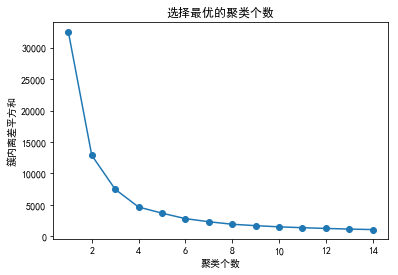

In [109]:
K = range(1,15)
GSSE = []
for k in K:
    print(k)
    SSE = []
    kmeans = KMeans(n_clusters=k, random_state=21)
    kmeans.fit(standard)
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_
    SSE.append(kmeans.inertia_)
    GSSE.append(np.sum(SSE))

# kmeans.inertia_ : 计算点到簇中心的距离

# 绘制K的个数与GSSE的关系
plt.plot(K, GSSE, 'o-')
plt.xlabel('聚类个数')
plt.ylabel('簇内离差平方和')
plt.title('选择最优的聚类个数')
plt.show()

In [110]:
num_clusters = 8
kmeans = KMeans(n_clusters=num_clusters, random_state=21)
kmeans.fit(standard)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=21, tol=0.0001, verbose=0)

In [111]:
rfm_data['cluster'] = kmeans.labels_ + 1

In [112]:
# 计算每个类别的数据量
kmeans_c1 = list(rfm_data["cluster"].value_counts().sort_index())

# 计算每个类别所占的百分比
kmeans_c2 = list(rfm_data["cluster"].value_counts().sort_index() / len(rfm_data) * 100)
kmeans_c3 = (list(map(lambda x: str(round(x, 2)) + "%", kmeans_c2)))

# 每个类别金额占比
kmeans_sum = rfm_data['M'].groupby(rfm_data['cluster']).sum()
kmeans_percent = kmeans_sum/rfm_data['M'].sum() * 100
kmeans_c4 = kmeans_percent.map(lambda x : str(round(x, 2)) + "%")

kmeans_c = pd.DataFrame({"cluster": range(1, len(kmeans_c1) + 1), "数量": kmeans_c1, "客户类型占比": kmeans_c3, "运费" : kmeans_sum, "运费占比" : kmeans_c4})
kmeans_c

,cluster,数量,客户类型占比,运费,运费占比
cluster,,,,,
1,1,37778,12.01%,1.133730e+08,1.54%
2,2,66733,21.21%,2.631070e+08,3.56%
3,3,19234,6.11%,1.632223e+09,22.1%
4,4,41672,13.24%,1.802577e+08,2.44%
5,5,33368,10.6%,4.590701e+07,0.62%
6,6,10186,3.24%,4.257193e+09,57.64%
7,7,52623,16.72%,1.552903e+08,2.1%
8,8,53067,16.86%,7.378876e+08,9.99%


In [113]:
standard['cluster'] = kmeans.labels_

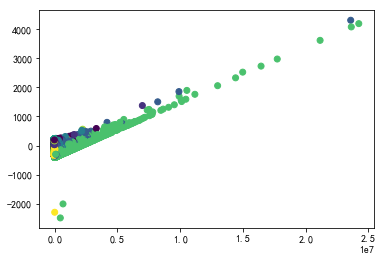

In [115]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(rfm_data[['L', 'R', 'F', 'M']])
result = pca.transform(rfm_data[['L', 'R', 'F', 'M']])
# pca.explained_variance_ratio_
plt.scatter(result[:,0], result[:, 1], c = rfm_data['cluster'], marker = 'o')